# Exploratory Analysis
@Author Friederike Moroff
@Author Mattes Warning

In [67]:
import warnings

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

warnings.filterwarnings("ignore")

In [68]:
# Read the data
data = pd.read_csv("../dat/preprocessed_brca_metabric_clinical_data.tsv", sep='\t')
data

,Unnamed: 0,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status,Chemotherapy Binary,Type of Breast Surgery Binary,Hormone Therapy Binary,Radio Therapy Binary,ER Status Binary
0,0,MB-0000,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,1.0,Positve,...,ER-/HER2-,0.000000,22.0,2.0,Living,0,1,1,1,1
1,1,MB-0002,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,NO,LumA,1.0,Positve,...,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living,0,0,1,1,1
2,2,MB-0005,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,YES,LumB,1.0,Positve,...,NaN,2.615035,15.0,2.0,Died of Disease,1,1,1,0,1
3,3,MB-0006,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,1.0,Positve,...,NaN,1.307518,25.0,2.0,Living,1,1,1,1,1
4,4,MB-0008,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,1.0,Positve,...,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1980,MB-7295,43.10,BREAST CONSERVING,Breast Invasive Lobular Carcinoma,High,NO,LumA,4.0,Positve,...,ER+/HER2- Low Prolif,5.230071,25.0,NaN,Living,0,0,1,1,1
1964,1981,MB-7296,42.88,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,NO,LumB,4.0,Positve,...,NaN,7.845106,20.0,NaN,Died of Disease,0,1,0,1,1
1965,1982,MB-7297,62.90,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,NO,LumB,4.0,Positve,...,NaN,5.230071,25.0,NaN,Died of Disease,0,1,1,1,1
1966,1983,MB-7298,61.16,MASTECTOMY,Breast Invasive Ductal Carcinoma,Moderate,NO,LumB,4.0,Positve,...,ER+/HER2- High Prolif,19.612766,25.0,NaN,Died of Other Causes,0,1,1,0,1


## 1. Friederike Moroff

#### 1.1. Overall Survival (Months)

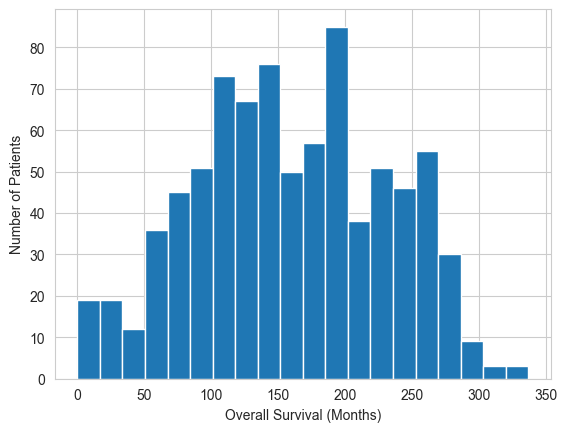

In [26]:
# For Overall Survival Status '0:LIVING' what is the Overall Survival (Months)
data_living = data[data['Overall Survival Status'] == '0:LIVING']
plt.hist(data_living['Overall Survival (Months)'],bins=20)
plt.xlabel('Overall Survival (Months)')
plt.ylabel('Number of Patients')
plt.show()

### 1.2. Check for normal distribution of data

In [27]:
def check_normality(df: pd.DataFrame, column_name: str):
    """
    Create histogram and probability plot for the counts a variable in a dataframe.
    :param df: A Dataframe
    :param column_name: A string corresponding to the column name of a count variable in the dataframe

    :return: None
    """
    # Histogram
    plt.hist(data[column_name], bins=20)
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.show()
    
    # QQ-plot
    stats.probplot(data[column_name], dist="norm", plot=plt)
    plt.show()
    
    return None

#### 1.2.1 Age at diagnosis

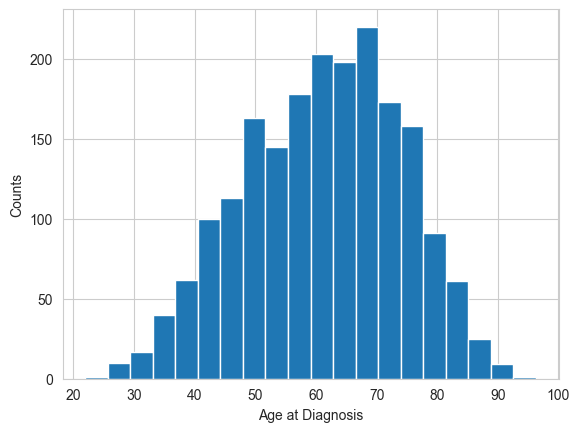

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


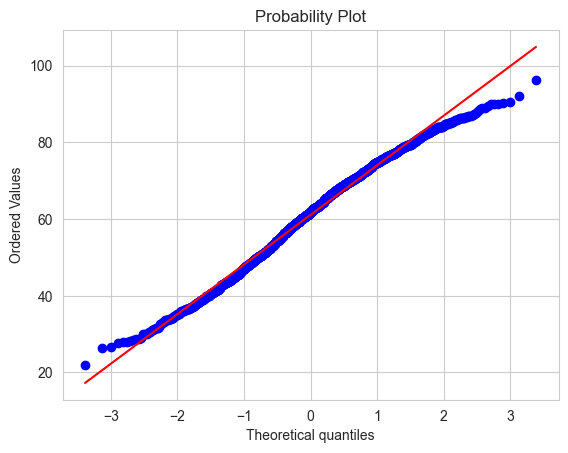

In [28]:
check_normality(data, 'Age at Diagnosis')

#### 1.2.2 Tumor size

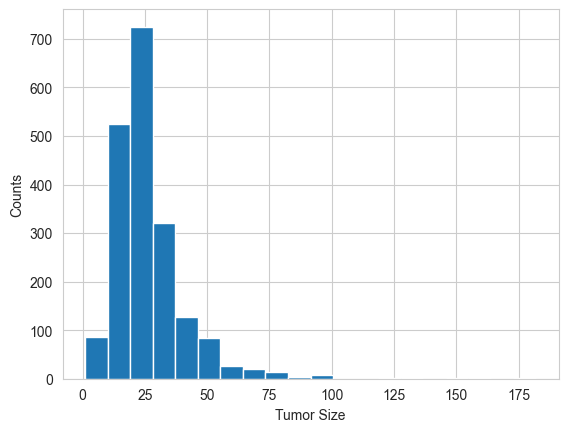

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


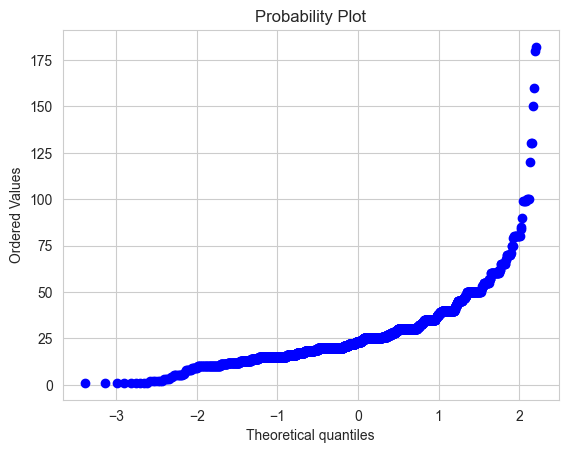

In [29]:
check_normality(data, 'Tumor Size')

#### 1.2.3. Mutation Count

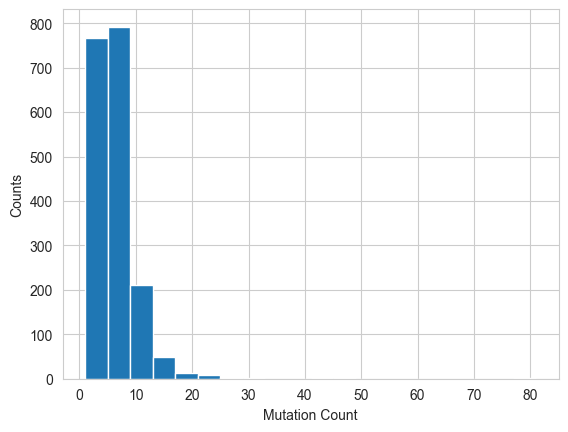

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


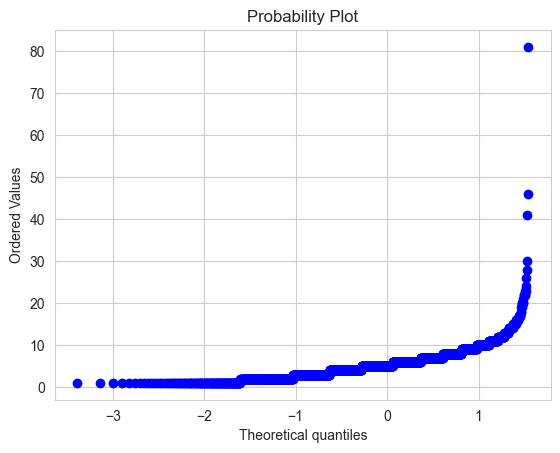

In [24]:
check_normality(data, 'Mutation Count')

#### 1.2.4 Lymph nodes examined positive

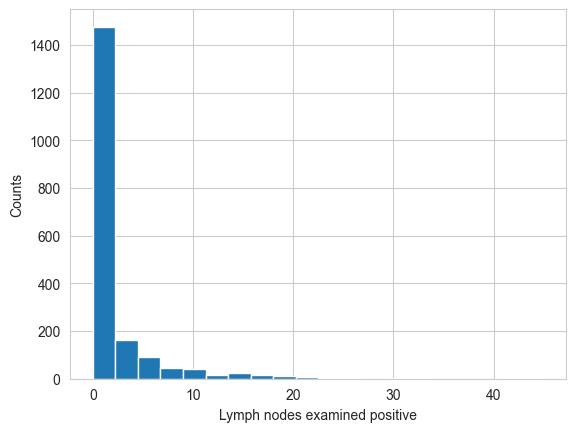

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


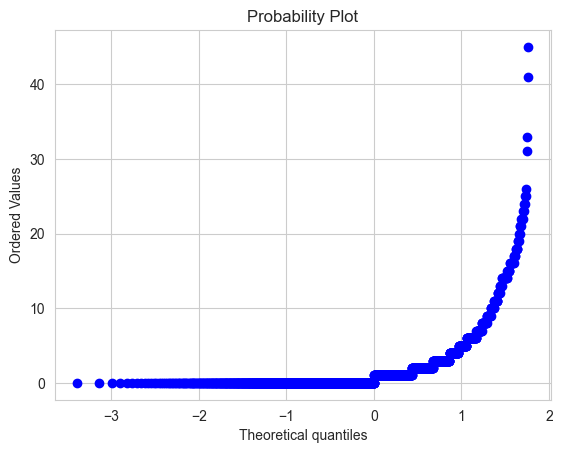

In [25]:
check_normality(data, 'Lymph nodes examined positive')

### 1.3. Age at Diagnosis compared to other variables

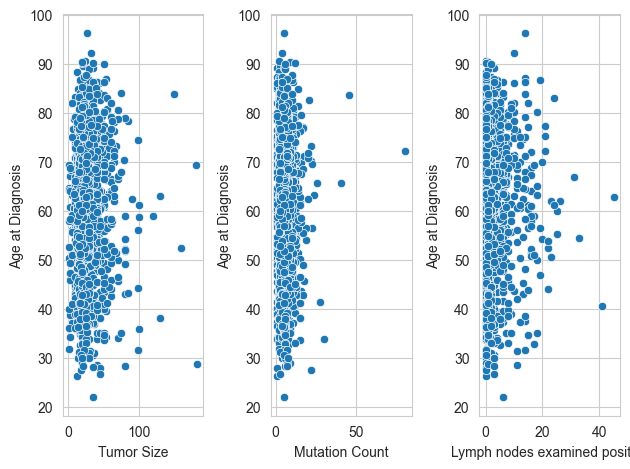

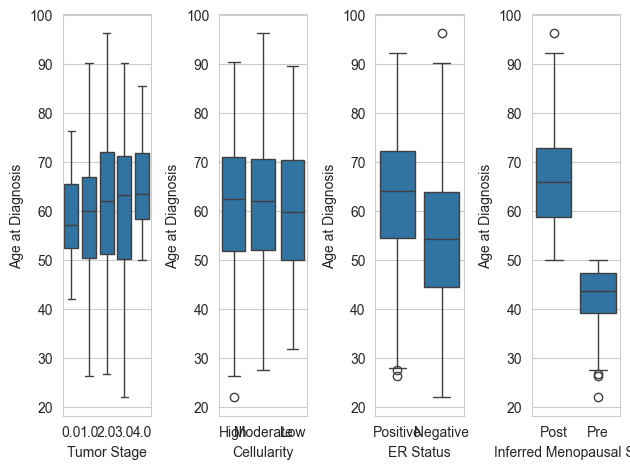

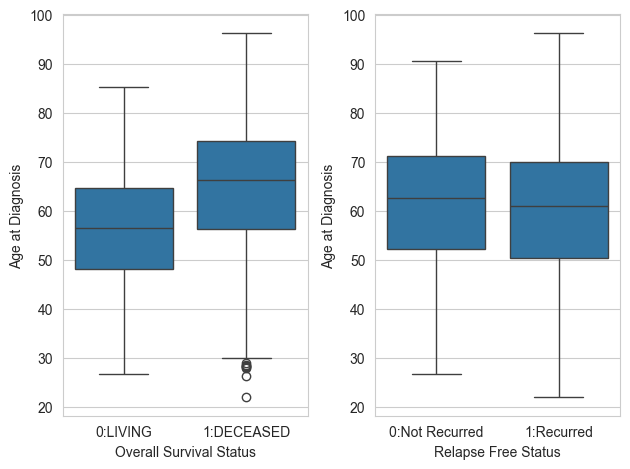

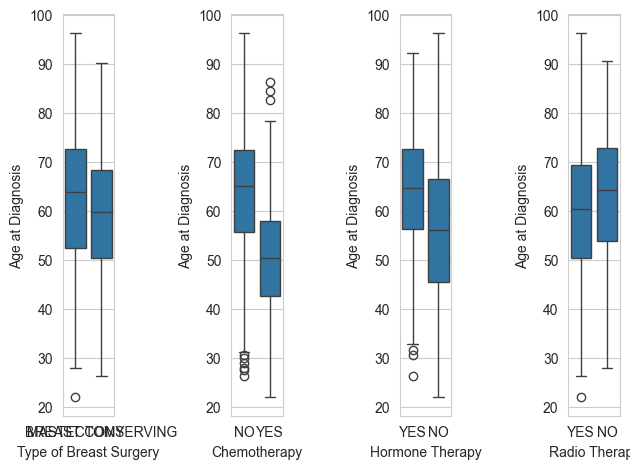

In [50]:
fig, axes = plt.subplots(1, 3)

sns.scatterplot(x='Tumor Size', y='Age at Diagnosis', data=data, ax=axes[0])
sns.scatterplot(x='Mutation Count', y='Age at Diagnosis', data=data, ax=axes[1])
sns.scatterplot(x='Lymph nodes examined positive', y='Age at Diagnosis', data=data, ax=axes[2])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 4)
sns.boxplot(x='Tumor Stage', y='Age at Diagnosis', data=data, ax=axes[0])
sns.boxplot(x='Cellularity', y='Age at Diagnosis', data=data, ax=axes[1])
sns.boxplot(x='ER Status', y='Age at Diagnosis', data=data, ax=axes[2])
sns.boxplot(x='Inferred Menopausal State', y='Age at Diagnosis', data=data, ax=axes[3])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2)
sns.boxplot(x='Overall Survival Status', y='Age at Diagnosis', data=data, ax=axes[0])
sns.boxplot(x='Relapse Free Status', y='Age at Diagnosis', data=data, ax=axes[1])
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4)
sns.boxplot(x='Type of Breast Surgery', y='Age at Diagnosis', data=data, ax=axes[0])
sns.boxplot(x='Chemotherapy', y='Age at Diagnosis', data=data, ax=axes[1])
sns.boxplot(x='Hormone Therapy', y='Age at Diagnosis', data=data, ax=axes[2])
sns.boxplot(x='Radio Therapy', y='Age at Diagnosis', data=data, ax=axes[3])

plt.tight_layout()
plt.show()

### 1.4. Correlation coefficient between Age at Diagnosis and...

#### 1.4.1. Tumor Size

In [55]:
data_ts = data.dropna(subset=['Age at Diagnosis', 'Tumor Size'])  # exclude NAs
result_pearson = pearsonr(data_ts['Age at Diagnosis'], data_ts['Tumor Size'])
result_spearman = spearmanr(data_ts['Age at Diagnosis'], data_ts['Tumor Size'])
print(' \nAge at Diagnosis and Tumor Size')
print('Pearson Correlation: ' + str(result_pearson.pvalue) + '\n'
      + 'Spearman Correlation: ' + str(result_spearman.pvalue))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 
Age at Diagnosis and Tumor Size
Pearson Correlation: 0.04387190942058416
Spearman Correlation: 6.783607539401283e-08


#### 1.4.2. Mutation Count

In [62]:
data_mc = data.dropna(subset=['Age at Diagnosis', 'Mutation Count'])  # exclude NAs
result_pearson = pearsonr(data_mc['Age at Diagnosis'], data_mc['Mutation Count'])
result_spearman = spearmanr(data_mc['Age at Diagnosis'], data_mc['Mutation Count'])
print('\nAge at Diagnosis and Mutation Count')
print('Pearson Correlation: ' + str(result_pearson.pvalue) + '\n'
      + 'Spearman Correlation: ' + str(result_spearman.pvalue))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Age at Diagnosis and Mutation Count
Pearson Correlation: 0.6310870406698966
Spearman Correlation: 0.7847706357341893


#### 1.4.3. Lymph nodes examined positive

In [61]:
data_ln = data.dropna(subset=['Age at Diagnosis', 'Lymph nodes examined positive'])  # exclude NAs
result_pearson = pearsonr(data_ln['Age at Diagnosis'], data_ln['Lymph nodes examined positive'])
result_spearman = spearmanr(data_ln['Age at Diagnosis'], data_ln['Lymph nodes examined positive'])
print(' \nAge at Diagnosis and Lymph nodes examined positive')
print('Pearson Correlation: ' + str(result_pearson.pvalue) + '\n'
      + 'Spearman Correlation: ' + str(result_spearman.pvalue))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 
Age at Diagnosis and Lymph nodes examined positive
Pearson Correlation: 0.7936606674812586
Spearman Correlation: 0.916015298177044


#### 1.4.4. Tumor Stage

In [63]:
data_ts = data.dropna(subset=['Tumor Stage'])  # exclude NAs

# Perform ANOVA
anova_result = f_oneway(*[data_ts['Age at Diagnosis'][data_ts['Tumor Stage'] == stage]
                          for stage in data_ts['Tumor Stage'].unique()])

print("ANOVA Result: " + str(anova_result.pvalue))

ANOVA Result: 0.006202877899869698


In [64]:
#### 1.4.5. ER Status

In [66]:
data_ts = data.dropna(subset=['ER Status'])  # exclude NAs
er_positive = data_ts[data_ts['ER Status Binary'] == 1]
er_negative = data_ts[data_ts['ER Status Binary'] == 0]

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(er_positive['Age at Diagnosis'], er_negative['Age at Diagnosis'])

print("T-Test Result: " + str(p_value))

T-Test Result: 1.6107403767107355e-37
